In [1]:
import gym

In [2]:
import numpy as np


In [3]:
import random

In [4]:
import matplotlib.pyplot as plt

In [5]:
flipped_4X4 = ['FFFS',
        'HFHF',
        'HFFF',
        'GFFH'] 

In [8]:
# env = gym.make('FrozenLakeNotSlippery-v0', is_slippery=False, desc = flipped_4X4)

# # Instantiate the Environment.
# # env = gym.make('FrozenLake-v0')

# # To check all environments present in OpenAI
# # print(envs.registry.all())

# # visualize 4x4 frozen lake
# env.render()
env = gym.make('FrozenLake-v1', is_slippery=False, desc = flipped_4X4)

env.reset()
# visualize 4x4 frozen lake
env.render()

In [9]:
# Total number of States and Actions
n_states = env.observation_space.n
n_actions = env.action_space.n
n_rows = int(np.sqrt(n_states))
n_cols=int(np.sqrt(n_states))
print( "States = ", n_states)
print( "Actions = ", n_actions)
print( "Rows = ", n_rows)
print( "Cols = ", n_cols)

States =  16
Actions =  4
Rows =  4
Cols =  4


In [10]:
# Start with 80% random actions to explore the environment
# exploration decays with each timestep by a factor of 0.999 until it hits 10% exploration rate 

epsilon = 1.0
epsilon_final = 0.10
epsilon_decay = 0.9999

In [11]:
gamma = 0.90 # discount factor
learning_rate = 0.90 #how important is the difference between q-val from q-table and what's observed

In [12]:

#Q = np.random.rand(15,4)*(1/100)
#Q = np.vstack([Q, np.zeros((1,4))])

Q = np.array([[0.        , 0.47827059, 0.59049   , 0. ],
       [0.53144098, 0.        , 0.6561    , 0.        ],
       [0.5904841 , 0.729     , 0.59048622, 0.        ],
       [0.65609993, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.53144047],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.81      , 0.        , 0.65609999],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.81      , 0.        ],
       [0.72899264, 0.9       , 0.        , 0.72899271],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.72899788],
       [0.65601433, 0.        , 1.        , 0.80919   ],
       [0.        , 0.        , 0.        , 0.        ]])

In [13]:
##assign index to each state using state-matrix

state_matrix = np.arange(0,16).reshape(4,4)
state_matrix

def rowsandcols(state):
    ''' input: state returned by env
    output: location of state as (row,col) tuple'''
    return int(np.where(state_matrix ==state)[0]), int(np.where(state_matrix ==state)[1])

In [14]:
def choose_random_action(state):
    ''' input = state returned by env.
      output = a random action depending on 
      whether the state is an edge/ corner or landlocked tile '''

   ##corner points    
    if rowsandcols(state)==( 0,0):
        action = random.choice([1,2])
    elif rowsandcols(state) ==(0,n_cols):
        action = random.choice([0,1])
    elif rowsandcols(state)==(n_rows,0):
        action = random.choice([2,3])
    elif rowsandcols(state)==(n_rows,n_cols):
        action = random.choice([0,3])
    ## no action needed to be chosen for (3,3) -- terminal state 

    ##edge tiles
    elif rowsandcols(state)  == (0,1) or rowsandcols(state)  ==  (0,2):
        action = random.choice([0,1,2])
    elif rowsandcols(state) == (1,0) or rowsandcols(state)  == (2,0):
        action = random.choice([1,2,3])
    elif rowsandcols(state) == (1,3) or rowsandcols(state) == (2,3):
        action = random.choice([0,1,3])
    elif rowsandcols(state) == (3,1) or rowsandcols(state) == (3,2) :
        action = random.choice([0,2,3])
  
    else:
        action = env.action_space.sample()
    
    return action

In [15]:
num_episodes = 100000
steps_total = [] # store number of steps taken in each episode
rewards_total = [] #store reward obtained for each episode
epsilon_total = [] #store epsilon obtained at the end of each episode

In [16]:
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0

    while True:
        
        step += 1
        
        
        ## generating a random num
        random_for_epsilon = np.random.rand()
        
        ## if random num lesser or equal to epsilon, then select random action
        if random_for_epsilon <= epsilon:     
            action = choose_random_action(state)  ##replace with action = env.action_space.sample() for action without restrictions
        
        ## else update q-vals for given state with infitismly small random nums and select argmax(a) for Q(s,a)
        else: 
            random_values = Q[state] + np.random.rand(1,n_actions)/100
            action =  np.argmax(random_values)
        
        
        ## as epsilon decays with more timesteps, the prob. of selecting a random val < e decays --> more likely to exploit.     
        if epsilon > epsilon_final:
            epsilon *= epsilon_decay
        
        ## env gives reward and next state and whether we've reached terminal state upon taking a at current state.. 
        new_state, reward, done, info = env.step(action)
        ##if you want reward penalized at for each timestep
        ## reward= reward*(0.9**step) 

        # filling the Q Table - 
        Q[state, action] = (1- learning_rate)*Q[state, action] + learning_rate*(reward + gamma * np.max(Q[new_state]))
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            epsilon_total.append(epsilon)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step, epsilon))
            break

Episode: 0 Reward: 0.0 Steps Taken: 13
Episode: 10 Reward: 0.0 Steps Taken: 7
Episode: 20 Reward: 0.0 Steps Taken: 15
Episode: 30 Reward: 0.0 Steps Taken: 3
Episode: 40 Reward: 0.0 Steps Taken: 4
Episode: 50 Reward: 0.0 Steps Taken: 11
Episode: 60 Reward: 0.0 Steps Taken: 12
Episode: 70 Reward: 0.0 Steps Taken: 4
Episode: 80 Reward: 0.0 Steps Taken: 7
Episode: 90 Reward: 0.0 Steps Taken: 5
Episode: 100 Reward: 0.0 Steps Taken: 9
Episode: 110 Reward: 0.0 Steps Taken: 3
Episode: 120 Reward: 0.0 Steps Taken: 4
Episode: 130 Reward: 0.0 Steps Taken: 6
Episode: 140 Reward: 0.0 Steps Taken: 4
Episode: 150 Reward: 0.0 Steps Taken: 13
Episode: 160 Reward: 0.0 Steps Taken: 5
Episode: 170 Reward: 0.0 Steps Taken: 5
Episode: 180 Reward: 0.0 Steps Taken: 3
Episode: 190 Reward: 0.0 Steps Taken: 2
Episode: 200 Reward: 0.0 Steps Taken: 4
Episode: 210 Reward: 0.0 Steps Taken: 3
Episode: 220 Reward: 0.0 Steps Taken: 4
Episode: 230 Reward: 0.0 Steps Taken: 2
Episode: 240 Reward: 0.0 Steps Taken: 7
Episod

Episode: 2440 Reward: 0.0 Steps Taken: 2
Episode: 2450 Reward: 0.0 Steps Taken: 2
Episode: 2460 Reward: 0.0 Steps Taken: 4
Episode: 2470 Reward: 0.0 Steps Taken: 3
Episode: 2480 Reward: 0.0 Steps Taken: 2
Episode: 2490 Reward: 0.0 Steps Taken: 2
Episode: 2500 Reward: 0.0 Steps Taken: 2
Episode: 2510 Reward: 1.0 Steps Taken: 8
Episode: 2520 Reward: 0.0 Steps Taken: 2
Episode: 2530 Reward: 0.0 Steps Taken: 2
Episode: 2540 Reward: 0.0 Steps Taken: 2
Episode: 2550 Reward: 0.0 Steps Taken: 3
Episode: 2560 Reward: 0.0 Steps Taken: 2
Episode: 2570 Reward: 0.0 Steps Taken: 4
Episode: 2580 Reward: 0.0 Steps Taken: 5
Episode: 2590 Reward: 0.0 Steps Taken: 2
Episode: 2600 Reward: 0.0 Steps Taken: 2
Episode: 2610 Reward: 0.0 Steps Taken: 3
Episode: 2620 Reward: 0.0 Steps Taken: 2
Episode: 2630 Reward: 0.0 Steps Taken: 2
Episode: 2640 Reward: 0.0 Steps Taken: 2
Episode: 2650 Reward: 0.0 Steps Taken: 2
Episode: 2660 Reward: 0.0 Steps Taken: 2
Episode: 2670 Reward: 0.0 Steps Taken: 4
Episode: 2680 Re

Episode: 5190 Reward: 0.0 Steps Taken: 2
Episode: 5200 Reward: 0.0 Steps Taken: 3
Episode: 5210 Reward: 0.0 Steps Taken: 3
Episode: 5220 Reward: 0.0 Steps Taken: 2
Episode: 5230 Reward: 0.0 Steps Taken: 2
Episode: 5240 Reward: 0.0 Steps Taken: 2
Episode: 5250 Reward: 0.0 Steps Taken: 4
Episode: 5260 Reward: 0.0 Steps Taken: 2
Episode: 5270 Reward: 0.0 Steps Taken: 2
Episode: 5280 Reward: 0.0 Steps Taken: 2
Episode: 5290 Reward: 0.0 Steps Taken: 4
Episode: 5300 Reward: 0.0 Steps Taken: 2
Episode: 5310 Reward: 0.0 Steps Taken: 4
Episode: 5320 Reward: 0.0 Steps Taken: 2
Episode: 5330 Reward: 0.0 Steps Taken: 2
Episode: 5340 Reward: 0.0 Steps Taken: 2
Episode: 5350 Reward: 0.0 Steps Taken: 2
Episode: 5360 Reward: 0.0 Steps Taken: 2
Episode: 5370 Reward: 0.0 Steps Taken: 2
Episode: 5380 Reward: 0.0 Steps Taken: 2
Episode: 5390 Reward: 0.0 Steps Taken: 2
Episode: 5400 Reward: 0.0 Steps Taken: 2
Episode: 5410 Reward: 0.0 Steps Taken: 2
Episode: 5420 Reward: 0.0 Steps Taken: 4
Episode: 5430 Re

Episode: 7830 Reward: 0.0 Steps Taken: 4
Episode: 7840 Reward: 0.0 Steps Taken: 2
Episode: 7850 Reward: 0.0 Steps Taken: 2
Episode: 7860 Reward: 0.0 Steps Taken: 2
Episode: 7870 Reward: 0.0 Steps Taken: 2
Episode: 7880 Reward: 0.0 Steps Taken: 2
Episode: 7890 Reward: 0.0 Steps Taken: 2
Episode: 7900 Reward: 0.0 Steps Taken: 2
Episode: 7910 Reward: 0.0 Steps Taken: 2
Episode: 7920 Reward: 0.0 Steps Taken: 2
Episode: 7930 Reward: 0.0 Steps Taken: 2
Episode: 7940 Reward: 0.0 Steps Taken: 2
Episode: 7950 Reward: 0.0 Steps Taken: 2
Episode: 7960 Reward: 0.0 Steps Taken: 2
Episode: 7970 Reward: 0.0 Steps Taken: 2
Episode: 7980 Reward: 0.0 Steps Taken: 2
Episode: 7990 Reward: 0.0 Steps Taken: 2
Episode: 8000 Reward: 0.0 Steps Taken: 2
Episode: 8010 Reward: 0.0 Steps Taken: 2
Episode: 8020 Reward: 0.0 Steps Taken: 2
Episode: 8030 Reward: 0.0 Steps Taken: 2
Episode: 8040 Reward: 1.0 Steps Taken: 6
Episode: 8050 Reward: 0.0 Steps Taken: 2
Episode: 8060 Reward: 0.0 Steps Taken: 2
Episode: 8070 Re

Episode: 10430 Reward: 0.0 Steps Taken: 2
Episode: 10440 Reward: 0.0 Steps Taken: 2
Episode: 10450 Reward: 0.0 Steps Taken: 2
Episode: 10460 Reward: 0.0 Steps Taken: 2
Episode: 10470 Reward: 0.0 Steps Taken: 3
Episode: 10480 Reward: 0.0 Steps Taken: 2
Episode: 10490 Reward: 0.0 Steps Taken: 2
Episode: 10500 Reward: 0.0 Steps Taken: 2
Episode: 10510 Reward: 0.0 Steps Taken: 3
Episode: 10520 Reward: 0.0 Steps Taken: 2
Episode: 10530 Reward: 0.0 Steps Taken: 2
Episode: 10540 Reward: 0.0 Steps Taken: 2
Episode: 10550 Reward: 0.0 Steps Taken: 2
Episode: 10560 Reward: 0.0 Steps Taken: 2
Episode: 10570 Reward: 0.0 Steps Taken: 2
Episode: 10580 Reward: 0.0 Steps Taken: 2
Episode: 10590 Reward: 0.0 Steps Taken: 2
Episode: 10600 Reward: 0.0 Steps Taken: 2
Episode: 10610 Reward: 0.0 Steps Taken: 2
Episode: 10620 Reward: 0.0 Steps Taken: 2
Episode: 10630 Reward: 0.0 Steps Taken: 2
Episode: 10640 Reward: 0.0 Steps Taken: 2
Episode: 10650 Reward: 0.0 Steps Taken: 2
Episode: 10660 Reward: 0.0 Steps T

Episode: 12440 Reward: 0.0 Steps Taken: 2
Episode: 12450 Reward: 0.0 Steps Taken: 2
Episode: 12460 Reward: 1.0 Steps Taken: 6
Episode: 12470 Reward: 0.0 Steps Taken: 2
Episode: 12480 Reward: 0.0 Steps Taken: 2
Episode: 12490 Reward: 0.0 Steps Taken: 2
Episode: 12500 Reward: 0.0 Steps Taken: 2
Episode: 12510 Reward: 0.0 Steps Taken: 2
Episode: 12520 Reward: 0.0 Steps Taken: 2
Episode: 12530 Reward: 0.0 Steps Taken: 2
Episode: 12540 Reward: 0.0 Steps Taken: 4
Episode: 12550 Reward: 0.0 Steps Taken: 2
Episode: 12560 Reward: 0.0 Steps Taken: 2
Episode: 12570 Reward: 0.0 Steps Taken: 2
Episode: 12580 Reward: 0.0 Steps Taken: 2
Episode: 12590 Reward: 0.0 Steps Taken: 2
Episode: 12600 Reward: 0.0 Steps Taken: 2
Episode: 12610 Reward: 0.0 Steps Taken: 2
Episode: 12620 Reward: 0.0 Steps Taken: 2
Episode: 12630 Reward: 0.0 Steps Taken: 2
Episode: 12640 Reward: 0.0 Steps Taken: 2
Episode: 12650 Reward: 0.0 Steps Taken: 3
Episode: 12660 Reward: 0.0 Steps Taken: 2
Episode: 12670 Reward: 0.0 Steps T

Episode: 14420 Reward: 0.0 Steps Taken: 2
Episode: 14430 Reward: 0.0 Steps Taken: 2
Episode: 14440 Reward: 0.0 Steps Taken: 2
Episode: 14450 Reward: 0.0 Steps Taken: 2
Episode: 14460 Reward: 0.0 Steps Taken: 2
Episode: 14470 Reward: 0.0 Steps Taken: 2
Episode: 14480 Reward: 0.0 Steps Taken: 2
Episode: 14490 Reward: 0.0 Steps Taken: 2
Episode: 14500 Reward: 0.0 Steps Taken: 5
Episode: 14510 Reward: 0.0 Steps Taken: 2
Episode: 14520 Reward: 0.0 Steps Taken: 2
Episode: 14530 Reward: 0.0 Steps Taken: 2
Episode: 14540 Reward: 0.0 Steps Taken: 2
Episode: 14550 Reward: 0.0 Steps Taken: 2
Episode: 14560 Reward: 0.0 Steps Taken: 2
Episode: 14570 Reward: 0.0 Steps Taken: 2
Episode: 14580 Reward: 0.0 Steps Taken: 2
Episode: 14590 Reward: 0.0 Steps Taken: 2
Episode: 14600 Reward: 0.0 Steps Taken: 2
Episode: 14610 Reward: 0.0 Steps Taken: 2
Episode: 14620 Reward: 0.0 Steps Taken: 2
Episode: 14630 Reward: 0.0 Steps Taken: 2
Episode: 14640 Reward: 0.0 Steps Taken: 2
Episode: 14650 Reward: 0.0 Steps T

Episode: 17400 Reward: 0.0 Steps Taken: 2
Episode: 17410 Reward: 0.0 Steps Taken: 2
Episode: 17420 Reward: 0.0 Steps Taken: 2
Episode: 17430 Reward: 0.0 Steps Taken: 2
Episode: 17440 Reward: 0.0 Steps Taken: 2
Episode: 17450 Reward: 0.0 Steps Taken: 2
Episode: 17460 Reward: 0.0 Steps Taken: 2
Episode: 17470 Reward: 0.0 Steps Taken: 2
Episode: 17480 Reward: 0.0 Steps Taken: 2
Episode: 17490 Reward: 0.0 Steps Taken: 2
Episode: 17500 Reward: 0.0 Steps Taken: 2
Episode: 17510 Reward: 0.0 Steps Taken: 2
Episode: 17520 Reward: 1.0 Steps Taken: 6
Episode: 17530 Reward: 0.0 Steps Taken: 2
Episode: 17540 Reward: 0.0 Steps Taken: 2
Episode: 17550 Reward: 0.0 Steps Taken: 2
Episode: 17560 Reward: 0.0 Steps Taken: 2
Episode: 17570 Reward: 0.0 Steps Taken: 2
Episode: 17580 Reward: 0.0 Steps Taken: 2
Episode: 17590 Reward: 0.0 Steps Taken: 2
Episode: 17600 Reward: 0.0 Steps Taken: 2
Episode: 17610 Reward: 0.0 Steps Taken: 2
Episode: 17620 Reward: 0.0 Steps Taken: 2
Episode: 17630 Reward: 0.0 Steps T

Episode: 19440 Reward: 0.0 Steps Taken: 2
Episode: 19450 Reward: 0.0 Steps Taken: 2
Episode: 19460 Reward: 0.0 Steps Taken: 2
Episode: 19470 Reward: 0.0 Steps Taken: 2
Episode: 19480 Reward: 0.0 Steps Taken: 3
Episode: 19490 Reward: 0.0 Steps Taken: 2
Episode: 19500 Reward: 0.0 Steps Taken: 2
Episode: 19510 Reward: 0.0 Steps Taken: 2
Episode: 19520 Reward: 0.0 Steps Taken: 3
Episode: 19530 Reward: 0.0 Steps Taken: 2
Episode: 19540 Reward: 1.0 Steps Taken: 6
Episode: 19550 Reward: 0.0 Steps Taken: 2
Episode: 19560 Reward: 0.0 Steps Taken: 2
Episode: 19570 Reward: 0.0 Steps Taken: 2
Episode: 19580 Reward: 0.0 Steps Taken: 2
Episode: 19590 Reward: 0.0 Steps Taken: 3
Episode: 19600 Reward: 0.0 Steps Taken: 2
Episode: 19610 Reward: 0.0 Steps Taken: 2
Episode: 19620 Reward: 0.0 Steps Taken: 2
Episode: 19630 Reward: 0.0 Steps Taken: 3
Episode: 19640 Reward: 0.0 Steps Taken: 2
Episode: 19650 Reward: 0.0 Steps Taken: 2
Episode: 19660 Reward: 0.0 Steps Taken: 2
Episode: 19670 Reward: 1.0 Steps T

Episode: 22060 Reward: 0.0 Steps Taken: 2
Episode: 22070 Reward: 0.0 Steps Taken: 2
Episode: 22080 Reward: 0.0 Steps Taken: 2
Episode: 22090 Reward: 0.0 Steps Taken: 2
Episode: 22100 Reward: 0.0 Steps Taken: 2
Episode: 22110 Reward: 1.0 Steps Taken: 6
Episode: 22120 Reward: 0.0 Steps Taken: 2
Episode: 22130 Reward: 0.0 Steps Taken: 2
Episode: 22140 Reward: 0.0 Steps Taken: 2
Episode: 22150 Reward: 0.0 Steps Taken: 2
Episode: 22160 Reward: 0.0 Steps Taken: 2
Episode: 22170 Reward: 0.0 Steps Taken: 2
Episode: 22180 Reward: 0.0 Steps Taken: 2
Episode: 22190 Reward: 0.0 Steps Taken: 2
Episode: 22200 Reward: 0.0 Steps Taken: 3
Episode: 22210 Reward: 0.0 Steps Taken: 2
Episode: 22220 Reward: 0.0 Steps Taken: 2
Episode: 22230 Reward: 0.0 Steps Taken: 4
Episode: 22240 Reward: 0.0 Steps Taken: 2
Episode: 22250 Reward: 0.0 Steps Taken: 2
Episode: 22260 Reward: 0.0 Steps Taken: 2
Episode: 22270 Reward: 0.0 Steps Taken: 2
Episode: 22280 Reward: 0.0 Steps Taken: 2
Episode: 22290 Reward: 0.0 Steps T

Episode: 24700 Reward: 0.0 Steps Taken: 5
Episode: 24710 Reward: 0.0 Steps Taken: 2
Episode: 24720 Reward: 0.0 Steps Taken: 2
Episode: 24730 Reward: 0.0 Steps Taken: 2
Episode: 24740 Reward: 0.0 Steps Taken: 3
Episode: 24750 Reward: 0.0 Steps Taken: 2
Episode: 24760 Reward: 0.0 Steps Taken: 2
Episode: 24770 Reward: 0.0 Steps Taken: 2
Episode: 24780 Reward: 0.0 Steps Taken: 2
Episode: 24790 Reward: 0.0 Steps Taken: 2
Episode: 24800 Reward: 0.0 Steps Taken: 2
Episode: 24810 Reward: 0.0 Steps Taken: 2
Episode: 24820 Reward: 0.0 Steps Taken: 2
Episode: 24830 Reward: 0.0 Steps Taken: 2
Episode: 24840 Reward: 0.0 Steps Taken: 2
Episode: 24850 Reward: 0.0 Steps Taken: 2
Episode: 24860 Reward: 0.0 Steps Taken: 2
Episode: 24870 Reward: 0.0 Steps Taken: 2
Episode: 24880 Reward: 1.0 Steps Taken: 6
Episode: 24890 Reward: 0.0 Steps Taken: 2
Episode: 24900 Reward: 1.0 Steps Taken: 6
Episode: 24910 Reward: 0.0 Steps Taken: 3
Episode: 24920 Reward: 0.0 Steps Taken: 2
Episode: 24930 Reward: 0.0 Steps T

Episode: 26750 Reward: 0.0 Steps Taken: 2
Episode: 26760 Reward: 0.0 Steps Taken: 2
Episode: 26770 Reward: 0.0 Steps Taken: 2
Episode: 26780 Reward: 0.0 Steps Taken: 2
Episode: 26790 Reward: 0.0 Steps Taken: 2
Episode: 26800 Reward: 0.0 Steps Taken: 2
Episode: 26810 Reward: 0.0 Steps Taken: 2
Episode: 26820 Reward: 0.0 Steps Taken: 2
Episode: 26830 Reward: 0.0 Steps Taken: 2
Episode: 26840 Reward: 0.0 Steps Taken: 2
Episode: 26850 Reward: 0.0 Steps Taken: 2
Episode: 26860 Reward: 0.0 Steps Taken: 3
Episode: 26870 Reward: 0.0 Steps Taken: 2
Episode: 26880 Reward: 0.0 Steps Taken: 2
Episode: 26890 Reward: 0.0 Steps Taken: 2
Episode: 26900 Reward: 0.0 Steps Taken: 2
Episode: 26910 Reward: 0.0 Steps Taken: 2
Episode: 26920 Reward: 0.0 Steps Taken: 2
Episode: 26930 Reward: 0.0 Steps Taken: 2
Episode: 26940 Reward: 0.0 Steps Taken: 2
Episode: 26950 Reward: 0.0 Steps Taken: 2
Episode: 26960 Reward: 0.0 Steps Taken: 2
Episode: 26970 Reward: 0.0 Steps Taken: 2
Episode: 26980 Reward: 0.0 Steps T

Episode: 28810 Reward: 0.0 Steps Taken: 2
Episode: 28820 Reward: 0.0 Steps Taken: 2
Episode: 28830 Reward: 0.0 Steps Taken: 2
Episode: 28840 Reward: 0.0 Steps Taken: 2
Episode: 28850 Reward: 0.0 Steps Taken: 2
Episode: 28860 Reward: 0.0 Steps Taken: 2
Episode: 28870 Reward: 0.0 Steps Taken: 2
Episode: 28880 Reward: 0.0 Steps Taken: 2
Episode: 28890 Reward: 0.0 Steps Taken: 2
Episode: 28900 Reward: 0.0 Steps Taken: 2
Episode: 28910 Reward: 0.0 Steps Taken: 2
Episode: 28920 Reward: 0.0 Steps Taken: 2
Episode: 28930 Reward: 0.0 Steps Taken: 2
Episode: 28940 Reward: 0.0 Steps Taken: 2
Episode: 28950 Reward: 0.0 Steps Taken: 2
Episode: 28960 Reward: 0.0 Steps Taken: 2
Episode: 28970 Reward: 0.0 Steps Taken: 2
Episode: 28980 Reward: 0.0 Steps Taken: 2
Episode: 28990 Reward: 0.0 Steps Taken: 2
Episode: 29000 Reward: 0.0 Steps Taken: 2
Episode: 29010 Reward: 0.0 Steps Taken: 2
Episode: 29020 Reward: 0.0 Steps Taken: 2
Episode: 29030 Reward: 0.0 Steps Taken: 2
Episode: 29040 Reward: 0.0 Steps T

Episode: 31550 Reward: 0.0 Steps Taken: 2
Episode: 31560 Reward: 0.0 Steps Taken: 2
Episode: 31570 Reward: 0.0 Steps Taken: 2
Episode: 31580 Reward: 0.0 Steps Taken: 2
Episode: 31590 Reward: 0.0 Steps Taken: 3
Episode: 31600 Reward: 0.0 Steps Taken: 2
Episode: 31610 Reward: 0.0 Steps Taken: 3
Episode: 31620 Reward: 0.0 Steps Taken: 2
Episode: 31630 Reward: 0.0 Steps Taken: 2
Episode: 31640 Reward: 0.0 Steps Taken: 2
Episode: 31650 Reward: 0.0 Steps Taken: 2
Episode: 31660 Reward: 0.0 Steps Taken: 2
Episode: 31670 Reward: 0.0 Steps Taken: 2
Episode: 31680 Reward: 0.0 Steps Taken: 2
Episode: 31690 Reward: 1.0 Steps Taken: 8
Episode: 31700 Reward: 0.0 Steps Taken: 2
Episode: 31710 Reward: 0.0 Steps Taken: 2
Episode: 31720 Reward: 0.0 Steps Taken: 2
Episode: 31730 Reward: 0.0 Steps Taken: 2
Episode: 31740 Reward: 0.0 Steps Taken: 2
Episode: 31750 Reward: 0.0 Steps Taken: 2
Episode: 31760 Reward: 0.0 Steps Taken: 2
Episode: 31770 Reward: 0.0 Steps Taken: 2
Episode: 31780 Reward: 0.0 Steps T

Episode: 34390 Reward: 0.0 Steps Taken: 2
Episode: 34400 Reward: 0.0 Steps Taken: 2
Episode: 34410 Reward: 1.0 Steps Taken: 6
Episode: 34420 Reward: 0.0 Steps Taken: 3
Episode: 34430 Reward: 0.0 Steps Taken: 2
Episode: 34440 Reward: 0.0 Steps Taken: 2
Episode: 34450 Reward: 0.0 Steps Taken: 2
Episode: 34460 Reward: 0.0 Steps Taken: 2
Episode: 34470 Reward: 0.0 Steps Taken: 2
Episode: 34480 Reward: 0.0 Steps Taken: 2
Episode: 34490 Reward: 0.0 Steps Taken: 2
Episode: 34500 Reward: 0.0 Steps Taken: 2
Episode: 34510 Reward: 0.0 Steps Taken: 2
Episode: 34520 Reward: 0.0 Steps Taken: 2
Episode: 34530 Reward: 0.0 Steps Taken: 2
Episode: 34540 Reward: 0.0 Steps Taken: 2
Episode: 34550 Reward: 0.0 Steps Taken: 2
Episode: 34560 Reward: 0.0 Steps Taken: 2
Episode: 34570 Reward: 0.0 Steps Taken: 2
Episode: 34580 Reward: 0.0 Steps Taken: 2
Episode: 34590 Reward: 0.0 Steps Taken: 2
Episode: 34600 Reward: 0.0 Steps Taken: 2
Episode: 34610 Reward: 0.0 Steps Taken: 2
Episode: 34620 Reward: 0.0 Steps T

Episode: 37140 Reward: 0.0 Steps Taken: 2
Episode: 37150 Reward: 0.0 Steps Taken: 2
Episode: 37160 Reward: 0.0 Steps Taken: 2
Episode: 37170 Reward: 0.0 Steps Taken: 4
Episode: 37180 Reward: 0.0 Steps Taken: 3
Episode: 37190 Reward: 0.0 Steps Taken: 2
Episode: 37200 Reward: 0.0 Steps Taken: 2
Episode: 37210 Reward: 0.0 Steps Taken: 2
Episode: 37220 Reward: 0.0 Steps Taken: 2
Episode: 37230 Reward: 0.0 Steps Taken: 2
Episode: 37240 Reward: 0.0 Steps Taken: 2
Episode: 37250 Reward: 0.0 Steps Taken: 2
Episode: 37260 Reward: 0.0 Steps Taken: 2
Episode: 37270 Reward: 0.0 Steps Taken: 2
Episode: 37280 Reward: 1.0 Steps Taken: 8
Episode: 37290 Reward: 0.0 Steps Taken: 3
Episode: 37300 Reward: 0.0 Steps Taken: 2
Episode: 37310 Reward: 0.0 Steps Taken: 2
Episode: 37320 Reward: 0.0 Steps Taken: 2
Episode: 37330 Reward: 0.0 Steps Taken: 2
Episode: 37340 Reward: 0.0 Steps Taken: 2
Episode: 37350 Reward: 0.0 Steps Taken: 2
Episode: 37360 Reward: 0.0 Steps Taken: 2
Episode: 37370 Reward: 0.0 Steps T

Episode: 39980 Reward: 0.0 Steps Taken: 2
Episode: 39990 Reward: 0.0 Steps Taken: 2
Episode: 40000 Reward: 0.0 Steps Taken: 4
Episode: 40010 Reward: 0.0 Steps Taken: 2
Episode: 40020 Reward: 0.0 Steps Taken: 2
Episode: 40030 Reward: 0.0 Steps Taken: 2
Episode: 40040 Reward: 0.0 Steps Taken: 2
Episode: 40050 Reward: 0.0 Steps Taken: 2
Episode: 40060 Reward: 0.0 Steps Taken: 2
Episode: 40070 Reward: 0.0 Steps Taken: 2
Episode: 40080 Reward: 0.0 Steps Taken: 2
Episode: 40090 Reward: 0.0 Steps Taken: 2
Episode: 40100 Reward: 0.0 Steps Taken: 2
Episode: 40110 Reward: 0.0 Steps Taken: 2
Episode: 40120 Reward: 0.0 Steps Taken: 2
Episode: 40130 Reward: 0.0 Steps Taken: 2
Episode: 40140 Reward: 0.0 Steps Taken: 2
Episode: 40150 Reward: 0.0 Steps Taken: 2
Episode: 40160 Reward: 0.0 Steps Taken: 2
Episode: 40170 Reward: 0.0 Steps Taken: 2
Episode: 40180 Reward: 0.0 Steps Taken: 2
Episode: 40190 Reward: 0.0 Steps Taken: 2
Episode: 40200 Reward: 1.0 Steps Taken: 6
Episode: 40210 Reward: 0.0 Steps T

Episode: 42030 Reward: 0.0 Steps Taken: 2
Episode: 42040 Reward: 0.0 Steps Taken: 2
Episode: 42050 Reward: 0.0 Steps Taken: 3
Episode: 42060 Reward: 0.0 Steps Taken: 2
Episode: 42070 Reward: 0.0 Steps Taken: 2
Episode: 42080 Reward: 0.0 Steps Taken: 2
Episode: 42090 Reward: 0.0 Steps Taken: 2
Episode: 42100 Reward: 0.0 Steps Taken: 2
Episode: 42110 Reward: 0.0 Steps Taken: 2
Episode: 42120 Reward: 0.0 Steps Taken: 4
Episode: 42130 Reward: 0.0 Steps Taken: 3
Episode: 42140 Reward: 0.0 Steps Taken: 3
Episode: 42150 Reward: 1.0 Steps Taken: 6
Episode: 42160 Reward: 0.0 Steps Taken: 2
Episode: 42170 Reward: 0.0 Steps Taken: 2
Episode: 42180 Reward: 1.0 Steps Taken: 8
Episode: 42190 Reward: 0.0 Steps Taken: 2
Episode: 42200 Reward: 0.0 Steps Taken: 2
Episode: 42210 Reward: 0.0 Steps Taken: 2
Episode: 42220 Reward: 0.0 Steps Taken: 2
Episode: 42230 Reward: 0.0 Steps Taken: 3
Episode: 42240 Reward: 0.0 Steps Taken: 2
Episode: 42250 Reward: 0.0 Steps Taken: 2
Episode: 42260 Reward: 0.0 Steps T

Episode: 44710 Reward: 0.0 Steps Taken: 2
Episode: 44720 Reward: 0.0 Steps Taken: 2
Episode: 44730 Reward: 0.0 Steps Taken: 2
Episode: 44740 Reward: 0.0 Steps Taken: 2
Episode: 44750 Reward: 0.0 Steps Taken: 2
Episode: 44760 Reward: 0.0 Steps Taken: 2
Episode: 44770 Reward: 0.0 Steps Taken: 2
Episode: 44780 Reward: 0.0 Steps Taken: 3
Episode: 44790 Reward: 0.0 Steps Taken: 2
Episode: 44800 Reward: 0.0 Steps Taken: 2
Episode: 44810 Reward: 0.0 Steps Taken: 2
Episode: 44820 Reward: 0.0 Steps Taken: 2
Episode: 44830 Reward: 0.0 Steps Taken: 2
Episode: 44840 Reward: 0.0 Steps Taken: 2
Episode: 44850 Reward: 0.0 Steps Taken: 2
Episode: 44860 Reward: 0.0 Steps Taken: 2
Episode: 44870 Reward: 0.0 Steps Taken: 2
Episode: 44880 Reward: 0.0 Steps Taken: 2
Episode: 44890 Reward: 0.0 Steps Taken: 2
Episode: 44900 Reward: 0.0 Steps Taken: 2
Episode: 44910 Reward: 0.0 Steps Taken: 2
Episode: 44920 Reward: 0.0 Steps Taken: 2
Episode: 44930 Reward: 0.0 Steps Taken: 2
Episode: 44940 Reward: 0.0 Steps T

Episode: 47700 Reward: 0.0 Steps Taken: 2
Episode: 47710 Reward: 0.0 Steps Taken: 2
Episode: 47720 Reward: 0.0 Steps Taken: 2
Episode: 47730 Reward: 0.0 Steps Taken: 4
Episode: 47740 Reward: 0.0 Steps Taken: 2
Episode: 47750 Reward: 0.0 Steps Taken: 2
Episode: 47760 Reward: 0.0 Steps Taken: 2
Episode: 47770 Reward: 0.0 Steps Taken: 2
Episode: 47780 Reward: 0.0 Steps Taken: 2
Episode: 47790 Reward: 0.0 Steps Taken: 2
Episode: 47800 Reward: 0.0 Steps Taken: 2
Episode: 47810 Reward: 0.0 Steps Taken: 2
Episode: 47820 Reward: 0.0 Steps Taken: 2
Episode: 47830 Reward: 0.0 Steps Taken: 2
Episode: 47840 Reward: 0.0 Steps Taken: 2
Episode: 47850 Reward: 0.0 Steps Taken: 2
Episode: 47860 Reward: 0.0 Steps Taken: 2
Episode: 47870 Reward: 0.0 Steps Taken: 2
Episode: 47880 Reward: 0.0 Steps Taken: 2
Episode: 47890 Reward: 0.0 Steps Taken: 4
Episode: 47900 Reward: 0.0 Steps Taken: 2
Episode: 47910 Reward: 0.0 Steps Taken: 2
Episode: 47920 Reward: 0.0 Steps Taken: 2
Episode: 47930 Reward: 0.0 Steps T

Episode: 50580 Reward: 0.0 Steps Taken: 2
Episode: 50590 Reward: 0.0 Steps Taken: 2
Episode: 50600 Reward: 0.0 Steps Taken: 2
Episode: 50610 Reward: 0.0 Steps Taken: 2
Episode: 50620 Reward: 0.0 Steps Taken: 2
Episode: 50630 Reward: 0.0 Steps Taken: 2
Episode: 50640 Reward: 0.0 Steps Taken: 2
Episode: 50650 Reward: 0.0 Steps Taken: 2
Episode: 50660 Reward: 0.0 Steps Taken: 2
Episode: 50670 Reward: 1.0 Steps Taken: 6
Episode: 50680 Reward: 0.0 Steps Taken: 2
Episode: 50690 Reward: 0.0 Steps Taken: 2
Episode: 50700 Reward: 0.0 Steps Taken: 2
Episode: 50710 Reward: 0.0 Steps Taken: 2
Episode: 50720 Reward: 0.0 Steps Taken: 2
Episode: 50730 Reward: 0.0 Steps Taken: 2
Episode: 50740 Reward: 0.0 Steps Taken: 2
Episode: 50750 Reward: 0.0 Steps Taken: 4
Episode: 50760 Reward: 0.0 Steps Taken: 3
Episode: 50770 Reward: 0.0 Steps Taken: 2
Episode: 50780 Reward: 0.0 Steps Taken: 2
Episode: 50790 Reward: 0.0 Steps Taken: 2
Episode: 50800 Reward: 0.0 Steps Taken: 2
Episode: 50810 Reward: 0.0 Steps T

Episode: 53450 Reward: 0.0 Steps Taken: 2
Episode: 53460 Reward: 0.0 Steps Taken: 2
Episode: 53470 Reward: 0.0 Steps Taken: 2
Episode: 53480 Reward: 0.0 Steps Taken: 2
Episode: 53490 Reward: 0.0 Steps Taken: 2
Episode: 53500 Reward: 0.0 Steps Taken: 2
Episode: 53510 Reward: 0.0 Steps Taken: 2
Episode: 53520 Reward: 0.0 Steps Taken: 3
Episode: 53530 Reward: 0.0 Steps Taken: 2
Episode: 53540 Reward: 0.0 Steps Taken: 2
Episode: 53550 Reward: 0.0 Steps Taken: 2
Episode: 53560 Reward: 0.0 Steps Taken: 2
Episode: 53570 Reward: 0.0 Steps Taken: 2
Episode: 53580 Reward: 0.0 Steps Taken: 2
Episode: 53590 Reward: 0.0 Steps Taken: 2
Episode: 53600 Reward: 0.0 Steps Taken: 2
Episode: 53610 Reward: 0.0 Steps Taken: 3
Episode: 53620 Reward: 0.0 Steps Taken: 2
Episode: 53630 Reward: 0.0 Steps Taken: 2
Episode: 53640 Reward: 0.0 Steps Taken: 2
Episode: 53650 Reward: 0.0 Steps Taken: 2
Episode: 53660 Reward: 0.0 Steps Taken: 2
Episode: 53670 Reward: 0.0 Steps Taken: 2
Episode: 53680 Reward: 0.0 Steps T

Episode: 56250 Reward: 0.0 Steps Taken: 2
Episode: 56260 Reward: 0.0 Steps Taken: 2
Episode: 56270 Reward: 0.0 Steps Taken: 2
Episode: 56280 Reward: 0.0 Steps Taken: 2
Episode: 56290 Reward: 0.0 Steps Taken: 2
Episode: 56300 Reward: 0.0 Steps Taken: 2
Episode: 56310 Reward: 0.0 Steps Taken: 2
Episode: 56320 Reward: 0.0 Steps Taken: 2
Episode: 56330 Reward: 0.0 Steps Taken: 2
Episode: 56340 Reward: 0.0 Steps Taken: 2
Episode: 56350 Reward: 0.0 Steps Taken: 2
Episode: 56360 Reward: 0.0 Steps Taken: 2
Episode: 56370 Reward: 0.0 Steps Taken: 2
Episode: 56380 Reward: 0.0 Steps Taken: 2
Episode: 56390 Reward: 0.0 Steps Taken: 2
Episode: 56400 Reward: 0.0 Steps Taken: 3
Episode: 56410 Reward: 0.0 Steps Taken: 2
Episode: 56420 Reward: 0.0 Steps Taken: 2
Episode: 56430 Reward: 0.0 Steps Taken: 2
Episode: 56440 Reward: 0.0 Steps Taken: 2
Episode: 56450 Reward: 0.0 Steps Taken: 2
Episode: 56460 Reward: 0.0 Steps Taken: 2
Episode: 56470 Reward: 0.0 Steps Taken: 2
Episode: 56480 Reward: 0.0 Steps T

Episode: 59080 Reward: 0.0 Steps Taken: 2
Episode: 59090 Reward: 0.0 Steps Taken: 4
Episode: 59100 Reward: 0.0 Steps Taken: 2
Episode: 59110 Reward: 0.0 Steps Taken: 2
Episode: 59120 Reward: 0.0 Steps Taken: 2
Episode: 59130 Reward: 0.0 Steps Taken: 2
Episode: 59140 Reward: 0.0 Steps Taken: 2
Episode: 59150 Reward: 0.0 Steps Taken: 2
Episode: 59160 Reward: 0.0 Steps Taken: 2
Episode: 59170 Reward: 0.0 Steps Taken: 2
Episode: 59180 Reward: 0.0 Steps Taken: 2
Episode: 59190 Reward: 0.0 Steps Taken: 2
Episode: 59200 Reward: 0.0 Steps Taken: 2
Episode: 59210 Reward: 0.0 Steps Taken: 2
Episode: 59220 Reward: 0.0 Steps Taken: 2
Episode: 59230 Reward: 1.0 Steps Taken: 6
Episode: 59240 Reward: 0.0 Steps Taken: 2
Episode: 59250 Reward: 0.0 Steps Taken: 2
Episode: 59260 Reward: 0.0 Steps Taken: 2
Episode: 59270 Reward: 0.0 Steps Taken: 2
Episode: 59280 Reward: 0.0 Steps Taken: 2
Episode: 59290 Reward: 0.0 Steps Taken: 2
Episode: 59300 Reward: 0.0 Steps Taken: 2
Episode: 59310 Reward: 0.0 Steps T

Episode: 61090 Reward: 0.0 Steps Taken: 2
Episode: 61100 Reward: 0.0 Steps Taken: 2
Episode: 61110 Reward: 0.0 Steps Taken: 2
Episode: 61120 Reward: 0.0 Steps Taken: 2
Episode: 61130 Reward: 0.0 Steps Taken: 2
Episode: 61140 Reward: 0.0 Steps Taken: 2
Episode: 61150 Reward: 0.0 Steps Taken: 2
Episode: 61160 Reward: 0.0 Steps Taken: 2
Episode: 61170 Reward: 0.0 Steps Taken: 2
Episode: 61180 Reward: 0.0 Steps Taken: 2
Episode: 61190 Reward: 0.0 Steps Taken: 2
Episode: 61200 Reward: 0.0 Steps Taken: 2
Episode: 61210 Reward: 0.0 Steps Taken: 3
Episode: 61220 Reward: 0.0 Steps Taken: 2
Episode: 61230 Reward: 0.0 Steps Taken: 2
Episode: 61240 Reward: 1.0 Steps Taken: 6
Episode: 61250 Reward: 0.0 Steps Taken: 2
Episode: 61260 Reward: 0.0 Steps Taken: 3
Episode: 61270 Reward: 0.0 Steps Taken: 2
Episode: 61280 Reward: 0.0 Steps Taken: 2
Episode: 61290 Reward: 0.0 Steps Taken: 2
Episode: 61300 Reward: 0.0 Steps Taken: 2
Episode: 61310 Reward: 0.0 Steps Taken: 2
Episode: 61320 Reward: 0.0 Steps T

Episode: 64010 Reward: 0.0 Steps Taken: 2
Episode: 64020 Reward: 0.0 Steps Taken: 2
Episode: 64030 Reward: 0.0 Steps Taken: 2
Episode: 64040 Reward: 0.0 Steps Taken: 2
Episode: 64050 Reward: 0.0 Steps Taken: 2
Episode: 64060 Reward: 0.0 Steps Taken: 2
Episode: 64070 Reward: 1.0 Steps Taken: 7
Episode: 64080 Reward: 0.0 Steps Taken: 2
Episode: 64090 Reward: 0.0 Steps Taken: 2
Episode: 64100 Reward: 0.0 Steps Taken: 2
Episode: 64110 Reward: 0.0 Steps Taken: 2
Episode: 64120 Reward: 0.0 Steps Taken: 3
Episode: 64130 Reward: 0.0 Steps Taken: 2
Episode: 64140 Reward: 0.0 Steps Taken: 2
Episode: 64150 Reward: 0.0 Steps Taken: 2
Episode: 64160 Reward: 0.0 Steps Taken: 2
Episode: 64170 Reward: 0.0 Steps Taken: 2
Episode: 64180 Reward: 1.0 Steps Taken: 6
Episode: 64190 Reward: 0.0 Steps Taken: 2
Episode: 64200 Reward: 0.0 Steps Taken: 2
Episode: 64210 Reward: 0.0 Steps Taken: 2
Episode: 64220 Reward: 0.0 Steps Taken: 2
Episode: 64230 Reward: 0.0 Steps Taken: 2
Episode: 64240 Reward: 0.0 Steps T

Episode: 66740 Reward: 0.0 Steps Taken: 2
Episode: 66750 Reward: 0.0 Steps Taken: 2
Episode: 66760 Reward: 0.0 Steps Taken: 2
Episode: 66770 Reward: 0.0 Steps Taken: 2
Episode: 66780 Reward: 0.0 Steps Taken: 2
Episode: 66790 Reward: 0.0 Steps Taken: 2
Episode: 66800 Reward: 0.0 Steps Taken: 2
Episode: 66810 Reward: 1.0 Steps Taken: 6
Episode: 66820 Reward: 0.0 Steps Taken: 2
Episode: 66830 Reward: 1.0 Steps Taken: 6
Episode: 66840 Reward: 0.0 Steps Taken: 2
Episode: 66850 Reward: 0.0 Steps Taken: 2
Episode: 66860 Reward: 0.0 Steps Taken: 2
Episode: 66870 Reward: 0.0 Steps Taken: 2
Episode: 66880 Reward: 0.0 Steps Taken: 2
Episode: 66890 Reward: 0.0 Steps Taken: 2
Episode: 66900 Reward: 0.0 Steps Taken: 2
Episode: 66910 Reward: 0.0 Steps Taken: 2
Episode: 66920 Reward: 0.0 Steps Taken: 2
Episode: 66930 Reward: 0.0 Steps Taken: 2
Episode: 66940 Reward: 0.0 Steps Taken: 2
Episode: 66950 Reward: 0.0 Steps Taken: 2
Episode: 66960 Reward: 0.0 Steps Taken: 2
Episode: 66970 Reward: 0.0 Steps T

Episode: 69600 Reward: 0.0 Steps Taken: 2
Episode: 69610 Reward: 0.0 Steps Taken: 4
Episode: 69620 Reward: 0.0 Steps Taken: 2
Episode: 69630 Reward: 0.0 Steps Taken: 2
Episode: 69640 Reward: 0.0 Steps Taken: 2
Episode: 69650 Reward: 0.0 Steps Taken: 2
Episode: 69660 Reward: 0.0 Steps Taken: 2
Episode: 69670 Reward: 0.0 Steps Taken: 2
Episode: 69680 Reward: 0.0 Steps Taken: 2
Episode: 69690 Reward: 0.0 Steps Taken: 2
Episode: 69700 Reward: 0.0 Steps Taken: 4
Episode: 69710 Reward: 0.0 Steps Taken: 2
Episode: 69720 Reward: 0.0 Steps Taken: 2
Episode: 69730 Reward: 0.0 Steps Taken: 2
Episode: 69740 Reward: 1.0 Steps Taken: 6
Episode: 69750 Reward: 0.0 Steps Taken: 2
Episode: 69760 Reward: 0.0 Steps Taken: 2
Episode: 69770 Reward: 0.0 Steps Taken: 2
Episode: 69780 Reward: 0.0 Steps Taken: 2
Episode: 69790 Reward: 0.0 Steps Taken: 2
Episode: 69800 Reward: 0.0 Steps Taken: 2
Episode: 69810 Reward: 0.0 Steps Taken: 2
Episode: 69820 Reward: 0.0 Steps Taken: 2
Episode: 69830 Reward: 0.0 Steps T

Episode: 71620 Reward: 0.0 Steps Taken: 4
Episode: 71630 Reward: 0.0 Steps Taken: 2
Episode: 71640 Reward: 0.0 Steps Taken: 2
Episode: 71650 Reward: 0.0 Steps Taken: 2
Episode: 71660 Reward: 0.0 Steps Taken: 2
Episode: 71670 Reward: 0.0 Steps Taken: 2
Episode: 71680 Reward: 0.0 Steps Taken: 2
Episode: 71690 Reward: 0.0 Steps Taken: 2
Episode: 71700 Reward: 0.0 Steps Taken: 2
Episode: 71710 Reward: 0.0 Steps Taken: 2
Episode: 71720 Reward: 0.0 Steps Taken: 2
Episode: 71730 Reward: 0.0 Steps Taken: 2
Episode: 71740 Reward: 0.0 Steps Taken: 2
Episode: 71750 Reward: 0.0 Steps Taken: 2
Episode: 71760 Reward: 0.0 Steps Taken: 2
Episode: 71770 Reward: 0.0 Steps Taken: 2
Episode: 71780 Reward: 0.0 Steps Taken: 2
Episode: 71790 Reward: 0.0 Steps Taken: 2
Episode: 71800 Reward: 0.0 Steps Taken: 2
Episode: 71810 Reward: 0.0 Steps Taken: 2
Episode: 71820 Reward: 0.0 Steps Taken: 2
Episode: 71830 Reward: 0.0 Steps Taken: 2
Episode: 71840 Reward: 0.0 Steps Taken: 2
Episode: 71850 Reward: 0.0 Steps T

Episode: 73610 Reward: 1.0 Steps Taken: 6
Episode: 73620 Reward: 0.0 Steps Taken: 2
Episode: 73630 Reward: 1.0 Steps Taken: 6
Episode: 73640 Reward: 0.0 Steps Taken: 2
Episode: 73650 Reward: 0.0 Steps Taken: 4
Episode: 73660 Reward: 0.0 Steps Taken: 3
Episode: 73670 Reward: 0.0 Steps Taken: 2
Episode: 73680 Reward: 0.0 Steps Taken: 2
Episode: 73690 Reward: 0.0 Steps Taken: 2
Episode: 73700 Reward: 0.0 Steps Taken: 2
Episode: 73710 Reward: 0.0 Steps Taken: 2
Episode: 73720 Reward: 0.0 Steps Taken: 2
Episode: 73730 Reward: 0.0 Steps Taken: 2
Episode: 73740 Reward: 0.0 Steps Taken: 2
Episode: 73750 Reward: 0.0 Steps Taken: 2
Episode: 73760 Reward: 0.0 Steps Taken: 2
Episode: 73770 Reward: 0.0 Steps Taken: 2
Episode: 73780 Reward: 0.0 Steps Taken: 2
Episode: 73790 Reward: 0.0 Steps Taken: 2
Episode: 73800 Reward: 0.0 Steps Taken: 2
Episode: 73810 Reward: 0.0 Steps Taken: 2
Episode: 73820 Reward: 0.0 Steps Taken: 2
Episode: 73830 Reward: 0.0 Steps Taken: 2
Episode: 73840 Reward: 0.0 Steps T

Episode: 75620 Reward: 0.0 Steps Taken: 2
Episode: 75630 Reward: 0.0 Steps Taken: 2
Episode: 75640 Reward: 0.0 Steps Taken: 2
Episode: 75650 Reward: 0.0 Steps Taken: 2
Episode: 75660 Reward: 0.0 Steps Taken: 2
Episode: 75670 Reward: 0.0 Steps Taken: 2
Episode: 75680 Reward: 0.0 Steps Taken: 2
Episode: 75690 Reward: 0.0 Steps Taken: 2
Episode: 75700 Reward: 0.0 Steps Taken: 4
Episode: 75710 Reward: 0.0 Steps Taken: 2
Episode: 75720 Reward: 0.0 Steps Taken: 2
Episode: 75730 Reward: 0.0 Steps Taken: 2
Episode: 75740 Reward: 0.0 Steps Taken: 5
Episode: 75750 Reward: 0.0 Steps Taken: 2
Episode: 75760 Reward: 0.0 Steps Taken: 2
Episode: 75770 Reward: 0.0 Steps Taken: 2
Episode: 75780 Reward: 0.0 Steps Taken: 2
Episode: 75790 Reward: 0.0 Steps Taken: 2
Episode: 75800 Reward: 0.0 Steps Taken: 2
Episode: 75810 Reward: 0.0 Steps Taken: 2
Episode: 75820 Reward: 0.0 Steps Taken: 2
Episode: 75830 Reward: 0.0 Steps Taken: 2
Episode: 75840 Reward: 0.0 Steps Taken: 2
Episode: 75850 Reward: 0.0 Steps T

Episode: 78420 Reward: 0.0 Steps Taken: 2
Episode: 78430 Reward: 0.0 Steps Taken: 2
Episode: 78440 Reward: 0.0 Steps Taken: 2
Episode: 78450 Reward: 0.0 Steps Taken: 2
Episode: 78460 Reward: 0.0 Steps Taken: 2
Episode: 78470 Reward: 0.0 Steps Taken: 2
Episode: 78480 Reward: 0.0 Steps Taken: 2
Episode: 78490 Reward: 0.0 Steps Taken: 2
Episode: 78500 Reward: 1.0 Steps Taken: 6
Episode: 78510 Reward: 1.0 Steps Taken: 6
Episode: 78520 Reward: 0.0 Steps Taken: 3
Episode: 78530 Reward: 0.0 Steps Taken: 2
Episode: 78540 Reward: 0.0 Steps Taken: 2
Episode: 78550 Reward: 0.0 Steps Taken: 2
Episode: 78560 Reward: 0.0 Steps Taken: 2
Episode: 78570 Reward: 0.0 Steps Taken: 4
Episode: 78580 Reward: 0.0 Steps Taken: 2
Episode: 78590 Reward: 0.0 Steps Taken: 3
Episode: 78600 Reward: 0.0 Steps Taken: 2
Episode: 78610 Reward: 0.0 Steps Taken: 2
Episode: 78620 Reward: 0.0 Steps Taken: 2
Episode: 78630 Reward: 0.0 Steps Taken: 2
Episode: 78640 Reward: 0.0 Steps Taken: 2
Episode: 78650 Reward: 0.0 Steps T

Episode: 80430 Reward: 0.0 Steps Taken: 2
Episode: 80440 Reward: 0.0 Steps Taken: 2
Episode: 80450 Reward: 0.0 Steps Taken: 2
Episode: 80460 Reward: 0.0 Steps Taken: 2
Episode: 80470 Reward: 0.0 Steps Taken: 2
Episode: 80480 Reward: 0.0 Steps Taken: 2
Episode: 80490 Reward: 0.0 Steps Taken: 2
Episode: 80500 Reward: 0.0 Steps Taken: 2
Episode: 80510 Reward: 0.0 Steps Taken: 2
Episode: 80520 Reward: 0.0 Steps Taken: 2
Episode: 80530 Reward: 0.0 Steps Taken: 2
Episode: 80540 Reward: 0.0 Steps Taken: 2
Episode: 80550 Reward: 0.0 Steps Taken: 2
Episode: 80560 Reward: 0.0 Steps Taken: 2
Episode: 80570 Reward: 0.0 Steps Taken: 2
Episode: 80580 Reward: 0.0 Steps Taken: 2
Episode: 80590 Reward: 0.0 Steps Taken: 2
Episode: 80600 Reward: 0.0 Steps Taken: 2
Episode: 80610 Reward: 0.0 Steps Taken: 2
Episode: 80620 Reward: 0.0 Steps Taken: 2
Episode: 80630 Reward: 0.0 Steps Taken: 5
Episode: 80640 Reward: 1.0 Steps Taken: 6
Episode: 80650 Reward: 0.0 Steps Taken: 2
Episode: 80660 Reward: 0.0 Steps T

Episode: 82400 Reward: 1.0 Steps Taken: 6
Episode: 82410 Reward: 0.0 Steps Taken: 2
Episode: 82420 Reward: 0.0 Steps Taken: 2
Episode: 82430 Reward: 0.0 Steps Taken: 2
Episode: 82440 Reward: 0.0 Steps Taken: 2
Episode: 82450 Reward: 0.0 Steps Taken: 2
Episode: 82460 Reward: 0.0 Steps Taken: 4
Episode: 82470 Reward: 0.0 Steps Taken: 2
Episode: 82480 Reward: 0.0 Steps Taken: 2
Episode: 82490 Reward: 0.0 Steps Taken: 2
Episode: 82500 Reward: 0.0 Steps Taken: 2
Episode: 82510 Reward: 0.0 Steps Taken: 2
Episode: 82520 Reward: 0.0 Steps Taken: 4
Episode: 82530 Reward: 0.0 Steps Taken: 4
Episode: 82540 Reward: 0.0 Steps Taken: 2
Episode: 82550 Reward: 0.0 Steps Taken: 2
Episode: 82560 Reward: 0.0 Steps Taken: 2
Episode: 82570 Reward: 0.0 Steps Taken: 2
Episode: 82580 Reward: 0.0 Steps Taken: 2
Episode: 82590 Reward: 0.0 Steps Taken: 2
Episode: 82600 Reward: 0.0 Steps Taken: 2
Episode: 82610 Reward: 0.0 Steps Taken: 2
Episode: 82620 Reward: 0.0 Steps Taken: 2
Episode: 82630 Reward: 0.0 Steps T

Episode: 85270 Reward: 0.0 Steps Taken: 2
Episode: 85280 Reward: 0.0 Steps Taken: 2
Episode: 85290 Reward: 0.0 Steps Taken: 5
Episode: 85300 Reward: 0.0 Steps Taken: 2
Episode: 85310 Reward: 0.0 Steps Taken: 2
Episode: 85320 Reward: 0.0 Steps Taken: 2
Episode: 85330 Reward: 0.0 Steps Taken: 2
Episode: 85340 Reward: 0.0 Steps Taken: 2
Episode: 85350 Reward: 0.0 Steps Taken: 2
Episode: 85360 Reward: 0.0 Steps Taken: 2
Episode: 85370 Reward: 0.0 Steps Taken: 2
Episode: 85380 Reward: 0.0 Steps Taken: 2
Episode: 85390 Reward: 0.0 Steps Taken: 2
Episode: 85400 Reward: 0.0 Steps Taken: 2
Episode: 85410 Reward: 0.0 Steps Taken: 2
Episode: 85420 Reward: 0.0 Steps Taken: 2
Episode: 85430 Reward: 0.0 Steps Taken: 7
Episode: 85440 Reward: 0.0 Steps Taken: 2
Episode: 85450 Reward: 0.0 Steps Taken: 2
Episode: 85460 Reward: 0.0 Steps Taken: 2
Episode: 85470 Reward: 0.0 Steps Taken: 2
Episode: 85480 Reward: 0.0 Steps Taken: 2
Episode: 85490 Reward: 0.0 Steps Taken: 2
Episode: 85500 Reward: 0.0 Steps T

Episode: 87290 Reward: 0.0 Steps Taken: 2
Episode: 87300 Reward: 0.0 Steps Taken: 2
Episode: 87310 Reward: 0.0 Steps Taken: 2
Episode: 87320 Reward: 0.0 Steps Taken: 2
Episode: 87330 Reward: 0.0 Steps Taken: 2
Episode: 87340 Reward: 0.0 Steps Taken: 2
Episode: 87350 Reward: 0.0 Steps Taken: 2
Episode: 87360 Reward: 0.0 Steps Taken: 2
Episode: 87370 Reward: 0.0 Steps Taken: 2
Episode: 87380 Reward: 0.0 Steps Taken: 2
Episode: 87390 Reward: 0.0 Steps Taken: 2
Episode: 87400 Reward: 0.0 Steps Taken: 2
Episode: 87410 Reward: 0.0 Steps Taken: 2
Episode: 87420 Reward: 0.0 Steps Taken: 2
Episode: 87430 Reward: 0.0 Steps Taken: 2
Episode: 87440 Reward: 0.0 Steps Taken: 2
Episode: 87450 Reward: 0.0 Steps Taken: 2
Episode: 87460 Reward: 0.0 Steps Taken: 2
Episode: 87470 Reward: 0.0 Steps Taken: 2
Episode: 87480 Reward: 0.0 Steps Taken: 2
Episode: 87490 Reward: 0.0 Steps Taken: 2
Episode: 87500 Reward: 0.0 Steps Taken: 2
Episode: 87510 Reward: 0.0 Steps Taken: 2
Episode: 87520 Reward: 0.0 Steps T

Episode: 90040 Reward: 1.0 Steps Taken: 6
Episode: 90050 Reward: 0.0 Steps Taken: 2
Episode: 90060 Reward: 0.0 Steps Taken: 2
Episode: 90070 Reward: 0.0 Steps Taken: 2
Episode: 90080 Reward: 0.0 Steps Taken: 2
Episode: 90090 Reward: 0.0 Steps Taken: 2
Episode: 90100 Reward: 0.0 Steps Taken: 2
Episode: 90110 Reward: 0.0 Steps Taken: 2
Episode: 90120 Reward: 0.0 Steps Taken: 2
Episode: 90130 Reward: 0.0 Steps Taken: 2
Episode: 90140 Reward: 0.0 Steps Taken: 2
Episode: 90150 Reward: 1.0 Steps Taken: 7
Episode: 90160 Reward: 0.0 Steps Taken: 2
Episode: 90170 Reward: 0.0 Steps Taken: 4
Episode: 90180 Reward: 0.0 Steps Taken: 2
Episode: 90190 Reward: 0.0 Steps Taken: 2
Episode: 90200 Reward: 0.0 Steps Taken: 2
Episode: 90210 Reward: 0.0 Steps Taken: 2
Episode: 90220 Reward: 0.0 Steps Taken: 2
Episode: 90230 Reward: 0.0 Steps Taken: 2
Episode: 90240 Reward: 0.0 Steps Taken: 2
Episode: 90250 Reward: 0.0 Steps Taken: 2
Episode: 90260 Reward: 0.0 Steps Taken: 2
Episode: 90270 Reward: 0.0 Steps T

Episode: 92050 Reward: 0.0 Steps Taken: 2
Episode: 92060 Reward: 0.0 Steps Taken: 2
Episode: 92070 Reward: 0.0 Steps Taken: 2
Episode: 92080 Reward: 0.0 Steps Taken: 2
Episode: 92090 Reward: 0.0 Steps Taken: 2
Episode: 92100 Reward: 0.0 Steps Taken: 2
Episode: 92110 Reward: 0.0 Steps Taken: 2
Episode: 92120 Reward: 0.0 Steps Taken: 2
Episode: 92130 Reward: 0.0 Steps Taken: 2
Episode: 92140 Reward: 0.0 Steps Taken: 2
Episode: 92150 Reward: 0.0 Steps Taken: 2
Episode: 92160 Reward: 0.0 Steps Taken: 2
Episode: 92170 Reward: 0.0 Steps Taken: 2
Episode: 92180 Reward: 0.0 Steps Taken: 2
Episode: 92190 Reward: 0.0 Steps Taken: 2
Episode: 92200 Reward: 0.0 Steps Taken: 2
Episode: 92210 Reward: 0.0 Steps Taken: 2
Episode: 92220 Reward: 0.0 Steps Taken: 2
Episode: 92230 Reward: 0.0 Steps Taken: 2
Episode: 92240 Reward: 0.0 Steps Taken: 2
Episode: 92250 Reward: 0.0 Steps Taken: 2
Episode: 92260 Reward: 1.0 Steps Taken: 6
Episode: 92270 Reward: 0.0 Steps Taken: 2
Episode: 92280 Reward: 0.0 Steps T

Episode: 94130 Reward: 0.0 Steps Taken: 2
Episode: 94140 Reward: 0.0 Steps Taken: 2
Episode: 94150 Reward: 0.0 Steps Taken: 2
Episode: 94160 Reward: 0.0 Steps Taken: 2
Episode: 94170 Reward: 0.0 Steps Taken: 2
Episode: 94180 Reward: 0.0 Steps Taken: 2
Episode: 94190 Reward: 0.0 Steps Taken: 2
Episode: 94200 Reward: 0.0 Steps Taken: 2
Episode: 94210 Reward: 0.0 Steps Taken: 2
Episode: 94220 Reward: 0.0 Steps Taken: 2
Episode: 94230 Reward: 0.0 Steps Taken: 2
Episode: 94240 Reward: 1.0 Steps Taken: 6
Episode: 94250 Reward: 0.0 Steps Taken: 2
Episode: 94260 Reward: 0.0 Steps Taken: 2
Episode: 94270 Reward: 0.0 Steps Taken: 2
Episode: 94280 Reward: 0.0 Steps Taken: 2
Episode: 94290 Reward: 0.0 Steps Taken: 3
Episode: 94300 Reward: 0.0 Steps Taken: 4
Episode: 94310 Reward: 0.0 Steps Taken: 2
Episode: 94320 Reward: 0.0 Steps Taken: 2
Episode: 94330 Reward: 0.0 Steps Taken: 2
Episode: 94340 Reward: 0.0 Steps Taken: 2
Episode: 94350 Reward: 0.0 Steps Taken: 2
Episode: 94360 Reward: 1.0 Steps T

Episode: 96220 Reward: 0.0 Steps Taken: 3
Episode: 96230 Reward: 0.0 Steps Taken: 2
Episode: 96240 Reward: 0.0 Steps Taken: 4
Episode: 96250 Reward: 0.0 Steps Taken: 2
Episode: 96260 Reward: 0.0 Steps Taken: 2
Episode: 96270 Reward: 0.0 Steps Taken: 2
Episode: 96280 Reward: 0.0 Steps Taken: 2
Episode: 96290 Reward: 0.0 Steps Taken: 2
Episode: 96300 Reward: 0.0 Steps Taken: 2
Episode: 96310 Reward: 0.0 Steps Taken: 2
Episode: 96320 Reward: 0.0 Steps Taken: 2
Episode: 96330 Reward: 0.0 Steps Taken: 2
Episode: 96340 Reward: 0.0 Steps Taken: 2
Episode: 96350 Reward: 0.0 Steps Taken: 2
Episode: 96360 Reward: 0.0 Steps Taken: 2
Episode: 96370 Reward: 0.0 Steps Taken: 2
Episode: 96380 Reward: 0.0 Steps Taken: 2
Episode: 96390 Reward: 0.0 Steps Taken: 2
Episode: 96400 Reward: 0.0 Steps Taken: 2
Episode: 96410 Reward: 0.0 Steps Taken: 2
Episode: 96420 Reward: 0.0 Steps Taken: 3
Episode: 96430 Reward: 0.0 Steps Taken: 2
Episode: 96440 Reward: 0.0 Steps Taken: 2
Episode: 96450 Reward: 0.0 Steps T

Episode: 98200 Reward: 0.0 Steps Taken: 2
Episode: 98210 Reward: 0.0 Steps Taken: 2
Episode: 98220 Reward: 0.0 Steps Taken: 3
Episode: 98230 Reward: 0.0 Steps Taken: 2
Episode: 98240 Reward: 0.0 Steps Taken: 2
Episode: 98250 Reward: 1.0 Steps Taken: 6
Episode: 98260 Reward: 0.0 Steps Taken: 2
Episode: 98270 Reward: 0.0 Steps Taken: 2
Episode: 98280 Reward: 0.0 Steps Taken: 2
Episode: 98290 Reward: 0.0 Steps Taken: 2
Episode: 98300 Reward: 0.0 Steps Taken: 2
Episode: 98310 Reward: 0.0 Steps Taken: 2
Episode: 98320 Reward: 0.0 Steps Taken: 2
Episode: 98330 Reward: 0.0 Steps Taken: 2
Episode: 98340 Reward: 0.0 Steps Taken: 2
Episode: 98350 Reward: 0.0 Steps Taken: 2
Episode: 98360 Reward: 0.0 Steps Taken: 2
Episode: 98370 Reward: 0.0 Steps Taken: 2
Episode: 98380 Reward: 0.0 Steps Taken: 3
Episode: 98390 Reward: 0.0 Steps Taken: 2
Episode: 98400 Reward: 0.0 Steps Taken: 2
Episode: 98410 Reward: 1.0 Steps Taken: 6
Episode: 98420 Reward: 0.0 Steps Taken: 2
Episode: 98430 Reward: 0.0 Steps T

In [38]:
def movmean(sig, wind = 10):
    av_sig = [np.mean(sig[i-int(wind/2) : i+int(wind/2)]) for i in np.arange(len(sig)-wind)+int(wind/2)+1]
    return av_sig
    

Text(0, 0.5, 'reward')

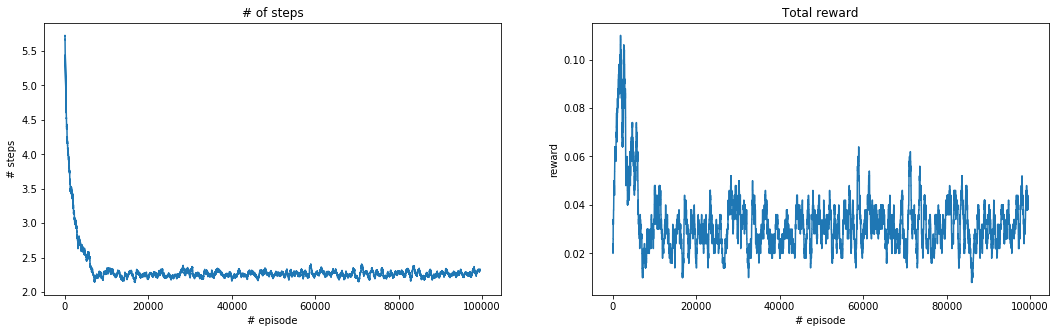

In [45]:
fig, ax = plt.subplots(1,2,sharex = True,figsize = (18,5))
ax[0].plot(movmean(steps_total,500)); ax[0].set_title('# of steps'); ax[0].set_xlabel('# episode'); ax[0].set_ylabel('# steps')
ax[1].plot(movmean(rewards_total,500)); ax[1].set_title('Total reward'); ax[1].set_xlabel('# episode'); ax[1].set_ylabel('reward')

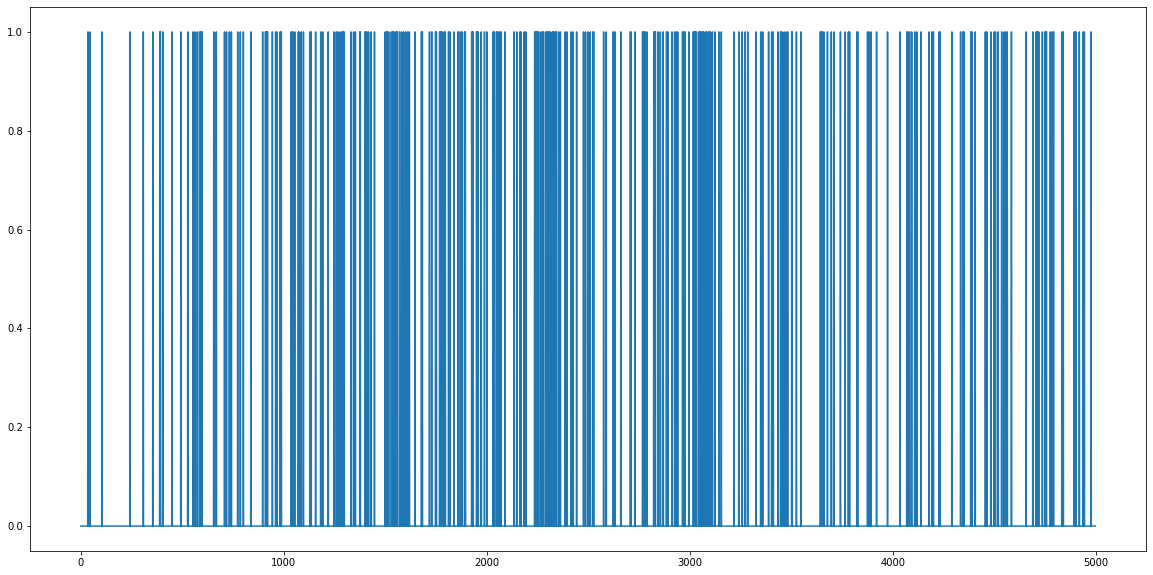

In [51]:
plt.figure(figsize = (20,10))
plt.plot(rewards_total[:5000])

In [52]:
np.unique(rewards_total)

array([0., 1.])

In [ ]:
### Transfer learning with flipped env

In [20]:
plt.axhline(y=6, color='green', linestyle='-')
plt.bar(np.arange(0, 100000), steps_total, 
        width = 0.4, color = 'blue')
plt.xlabel('episode index')
plt.ylabel('number of steps taken')
plt.title('4x4: restricted actions')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EAE665A318> (for post_execute):


KeyboardInterrupt: 

In [18]:
Q

array([[0.00000000e+00, 4.78296423e-01, 6.56100000e-01, 0.00000000e+00],
       [5.90490000e-01, 7.29000000e-01, 6.56100000e-01, 0.00000000e+00],
       [6.56100000e-01, 7.29000000e-01, 5.90490000e-01, 0.00000000e+00],
       [6.56100000e-01, 6.56100000e-01, 5.90490000e-01, 5.90490000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.31440470e-01],
       [4.78296423e-01, 8.10000000e-01, 7.29000000e-01, 6.56100000e-01],
       [0.00000000e+00, 8.10000000e-01, 0.00000000e+00, 6.56099990e-01],
       [7.29000000e-01, 6.56100000e-01, 0.00000000e+00, 5.90490000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.00000000e-01, 7.29000000e-01, 7.29000000e-01],
       [8.10000000e-01, 8.10000000e-01, 6.56100000e-01, 7.29000000e-01],
       [7.29000000e-01, 0.00000000e+00, 0.00000000e+00, 6.56100000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 8.10000000e

In [19]:
## Flipped Environment

In [ ]:
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0

    while True:
        
        step += 1
        
        
        ## generating a random num
        random_for_epsilon = np.random.rand()
        
        ## if random num lesser or equal to epsilon, then select random action
        if random_for_epsilon <= epsilon:     
            action = choose_random_action(state)  ##replace with action = env.action_space.sample() for action without restrictions
        
        ## else update q-vals for given state with infitismly small random nums and select argmax(a) for Q(s,a)
        else: 
            random_values = Q[state] + np.random.rand(1,n_actions)/100
            action =  np.argmax(random_values)
        
        
        ## as epsilon decays with more timesteps, the prob. of selecting a random val < e decays --> more likely to exploit.     
        if epsilon > epsilon_final:
            epsilon *= epsilon_decay
        
        ## env gives reward and next state and whether we've reached terminal state upon taking a at current state.. 
        new_state, reward, done, info = env.step(action)
        ##if you want reward penalized at for each timestep
        ## reward= reward*(0.9**step) 

        # filling the Q Table - 
        Q[state, action] = (1- learning_rate)*Q[state, action] + learning_rate*(reward + gamma * np.max(Q[new_state]))
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            epsilon_total.append(epsilon)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step, epsilon))
            break